In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\mvanj\Desktop\healthcare claims project\insurance_data.csv")

In [3]:
df.head()


,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [4]:
df.isnull().sum()


index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [5]:
updated_df = df
updated_df['age']=updated_df['age'].fillna(updated_df['age'].mean())
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1340 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [6]:
df['region'].fillna(df['region'].mode()[0],inplace=True)


In [7]:
df['region'].fillna(df['region'].mode()[0],inplace=True)
df.isnull().sum()


index            0
PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

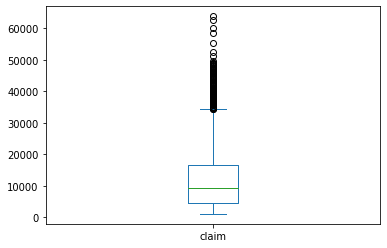

In [8]:
df['claim'].plot(kind='box')


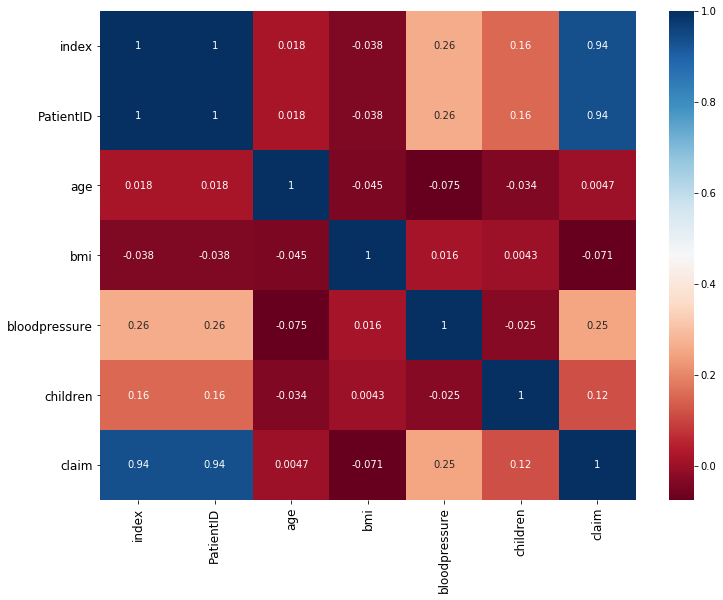

In [43]:
plt.figure(figsize = (12,9))
s = sns.heatmap(df.corr(),annot = True,cmap='RdBu')
s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(),rotation = 90, fontsize=12)
plt.show()

In [9]:
#REMOVING OUTLIERS
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\mvanj\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


In [10]:
df_one_hot=pd.get_dummies(df)


In [11]:
df_one_hot


,index,PatientID,age,bmi,bloodpressure,children,claim,gender_female,gender_male,diabetic_No,diabetic_Yes,smoker_No,smoker_Yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0,1,39.000000,23.2,91,0,1121.87,0,1,0,1,1,0,0,0,1,0
1,1,2,24.000000,30.1,87,0,1131.51,0,1,1,0,1,0,0,0,1,0
2,2,3,38.078652,33.3,82,0,1135.94,0,1,0,1,1,0,0,0,1,0
3,3,4,38.078652,33.7,80,0,1136.40,0,1,1,0,1,0,0,1,0,0
4,4,5,38.078652,34.1,100,0,1137.01,0,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,1190,1191,29.000000,37.5,106,2,33471.97,1,0,0,1,1,0,0,1,0,0
1191,1191,1192,29.000000,30.7,94,0,33475.82,0,1,1,0,0,1,1,0,0,0
1193,1193,1194,46.000000,31.9,82,0,33750.29,0,1,0,1,0,1,0,1,0,0
1195,1195,1196,59.000000,30.4,80,0,33907.55,1,0,1,0,0,1,0,1,0,0


In [12]:
#DEFINE X AND Y
X=df_one_hot.drop("claim",axis=1)
y=df_one_hot["claim"]

In [13]:
#splitting training and test data set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=43)

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=43)


In [15]:
#DATA NORMALIZATION BY MIN-MAX
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [16]:
#CREATING THE NETWORK
import tensorflow as tf
tf.random.set_seed(42)
#create a model
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#compile the model
insurance_model.compile(
                         loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"]
)
#fit the model
history=insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 9597.2217 - mae: 9597.2217
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 8422.9707 - mae: 8422.9707
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 6596.5410 - mae: 6596.5410
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 3358.4082 - mae: 3358.4082
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 1638.4053 - mae: 1638.4053
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 1462.3949 - mae: 1462.3949
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 1439.4069 - mae: 1439.4069
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 1421.9489 - mae: 1421.9489
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 1405.9147 - mae: 1405.9147
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 1391.9390 - mae: 1391.9390

In [18]:
# Define a Sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.05) ,input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model with validation data
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

# Evaluate the model on the test data
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Squared Error: {loss:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Epoch 1/100
24/24 [==============================] - 1s 13ms/step - loss: 153520208.0000 - mean_absolute_error: 10082.4805 - val_loss: 140948224.0000 - val_mean_absolute_error: 9516.3389
Epoch 2/100
24/24 [==============================] - 0s 5ms/step - loss: 150778128.0000 - mean_absolute_error: 9981.8301 - val_loss: 138444880.0000 - val_mean_absolute_error: 9421.4873
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 148109904.0000 - mean_absolute_error: 9885.2861 - val_loss: 136072784.0000 - val_mean_absolute_error: 9329.9268
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 145428096.0000 - mean_absolute_error: 9785.7090 - val_loss: 133517696.0000 - val_mean_absolute_error: 9229.6318
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 142450608.0000 - mean_absolute_error: 9672.5654 - val_loss: 130533472.0000 - val_mean_absolute_error: 9111.5723
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 

In [19]:
import tensorflow as tf
from tensorflow.keras.callbacks import History

# Create an instance of History callback to collect training history
history = History()

# Define and compile your model
model = tf.keras.Sequential([

])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model with the history callback
history = model.fit(X_train, y_train, epochs=100)

# Extract training and validation loss from the history object
training_loss = history.history['loss']

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 139962672.0000 - mae: 9580.2451
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 139962672.0000 - mae: 9580.2461
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 139962656.0000 - mae: 9580.2461
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 139962672.0000 - mae: 9580.2471
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 139962688.0000 - mae: 9580.2451
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 139962688.0000 - mae: 9580.2451
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 139962688.0000 - mae: 9580.2471
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 139962656.0000 - mae: 9580.2461
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 139962656.0000 - mae: 9580.2461
Epoch 10/100
24/24 [==============================] - 0

Epoch 1/100
24/24 [==============================] - 0s 10ms/step - loss: 139962672.0000 - mae: 9580.2451 - val_loss: 129893920.0000 - val_mae: 9088.2383
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 139962672.0000 - mae: 9580.2461 - val_loss: 129893920.0000 - val_mae: 9088.2383
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 139962656.0000 - mae: 9580.2461 - val_loss: 129893920.0000 - val_mae: 9088.2383
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 139962672.0000 - mae: 9580.2471 - val_loss: 129893920.0000 - val_mae: 9088.2383
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 139962688.0000 - mae: 9580.2451 - val_loss: 129893920.0000 - val_mae: 9088.2383
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 139962688.0000 - mae: 9580.2451 - val_loss: 129893920.0000 - val_mae: 9088.2383
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 13996268

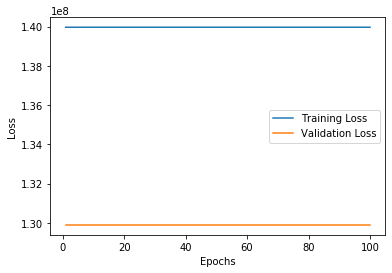

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Create a History callback to collect training history
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

# Collect training and validation loss values from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot training and validation loss
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.neural_network import MLPRegressor

# Define your model
model = MLPRegressor(max_iter=1000,learning_rate_init=0.8, random_state=42)

# Define a range of hyperparameter values to search
param_grid = {
    'hidden_layer_sizes': [(30,20), (100,50,30), (200,100,50)],
    'batch_size': [16, 32, 64, 128],
    'alpha': [10.0,100.0,1000.0],
}

# Define the number of cross-validation folds
n_folds = 5

# Define a scoring metric (e.g., Mean Squared Error)
scorer = make_scorer(mean_squared_error)

# Create a KFold object for cross-validation
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, scoring=scorer, cv=kf, verbose=1)

# Fit the GridSearchCV object to your data
grid_search.fit(X, y)

# Get the best hyperparameters from the search
best_hidden_layer_sizes = grid_search.best_params_['hidden_layer_sizes']
best_batch_size = grid_search.best_params_['batch_size']
best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

print(f'Best Hidden Layer Sizes: {best_hidden_layer_sizes}')
print(f'Best Batch Size: {best_batch_size}')
print(f'Best Alpha: {best_alpha}')
print(f'Best Mean Squared Error: {best_score}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  5.6min finished


Best Hidden Layer Sizes: (200, 100, 50)
Best Batch Size: 32
Best Alpha: 1000.0
Best Mean Squared Error: 22172335.662158612


In [22]:
best_alpha = 100.0
best_batch_size = 16
best_hidden_layer_sizes = (100, 50, 30)
model = MLPRegressor(
    hidden_layer_sizes=(100,50,30),  # chosen hidden layer sizes
    alpha=best_alpha,
    max_iter=2000,
    random_state=42,
    early_stopping=True,        # Enable early stopping
    n_iter_no_change=10,       # Number of iterations with no improvement before stopping
)
model.fit(X_train, y_train)
y_pred_val=model.predict(X_val)
r_squared_val = r2_score(y_val, y_pred_val)
print(f'Validation R-squared Score: {r_squared_val}')

Validation R-squared Score: 0.9394465985868183


In [23]:
best_alpha = 100.0
best_batch_size = 16
best_hidden_layer_sizes = (100, 50, 30)
model = MLPRegressor(
    hidden_layer_sizes=(100,50,30),  # Your chosen hidden layer sizes
    alpha=best_alpha,
    max_iter=2000,
    random_state=42,
    early_stopping=True,        # Enable early stopping
    n_iter_no_change=10,       # Number of iterations with no improvement before stopping
)
model.fit(X_train, y_train)
y_pred_test=model.predict(X_test)
r_squared_test = r2_score(y_test, y_pred_test)
print(f'testing R-squared Score: {r_squared_test}')

testing R-squared Score: 0.9494182490617239


In [24]:
best_alpha = 100.0
best_batch_size = 16
best_hidden_layer_sizes = (100, 50, 30)
model = MLPRegressor(
    hidden_layer_sizes=(100,50,30),  # Your chosen hidden layer sizes
    alpha=best_alpha,
    max_iter=2000,
    random_state=42,
    early_stopping=True,        # Enable early stopping
    n_iter_no_change=10,       # Number of iterations with no improvement before stopping
)
model.fit(X_train, y_train)
y_pred_train=model.predict(X_train)
r_squared_train = r2_score(y_train, y_pred_train)
print(f'training R-squared Score: {r_squared_train}')

training R-squared Score: 0.9501223553272898


In [25]:
#PREDICTION FOR NEW PATIENT
import numpy as np
import tensorflow as tf

# Define the feature values for the new patient as a dictionary
new_patient_data = {
    'index': 0,
    'PatientID': 456,
    'age': 50,
    'gender_male': 1,
    'gender_female': 0,# one-hot encoded 'sex' (0 for female, 1 for male)
    'bmi': 50.20,
    'bloodpressure':50,
    'diabetic_Yes':1,
    'diabetic_No': 0,
    'children': 2,
    'smoker_Yes': 1,
    'smoker_No':0,# one-hot encoded 'smoker' (1 for smoker, 0 for non-smoker)
    'region_northeast': 1,
    'region_northwest': 0,
    'region_southeast':0,
    'region_southwest':0

}

# Create a DataFrame from the dictionary
import pandas as pd
new_patient_df = pd.DataFrame(new_patient_data, index=[0])

# Make predictions for the new patient
predicted_charges = insurance_model.predict(new_patient_df)

# Display the predicted insurance charges
predicted_charge_for_new_patient = predicted_charges[0][0]
print(f'Predicted Insurance Charges for New Patient: ${predicted_charge_for_new_patient:.2f}')

1/1 [==============================] - 0s 143ms/step
Predicted Insurance Charges for New Patient: $638.58


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
rf = RandomForestRegressor(n_estimators=100, random_state=43)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

rmse = mean_squared_error(y_test, y_pred, squared=False)

r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print('R-squared score:', r2)

Mean Absolute Error: 31.172803389830673
Root Mean Squared Error: 98.15580997161368
R-squared score: 0.9997562155686611


In [27]:
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:   41.1s finished


Best parameters:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best score:  0.999758261625902


In [28]:
best_rf = RandomForestRegressor(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

rmse = mean_squared_error(y_test, y_pred, squared=False)

r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print('R-squared score:', r2)

Mean Absolute Error: 32.151867928131274
Root Mean Squared Error: 97.65888584594221
R-squared score: 0.9997586776891905


In [29]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Create a RandomForest model
rf_model = RandomForestRegressor()

# Fit the model to your data
rf_model.fit(X,y)  # Use your full feature set (X) and target variable (y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Get feature names (assuming X is a DataFrame with column names)
new_feature_names = ['age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'smoker']

# Sort features by importance
sorted_feature_importance = sorted(zip(new_feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# Unpack feature names and importances
new_feature_names, feature_importances = zip(*sorted_feature_importance)

In [30]:
sorted_feature_importance

[('gender', 0.5332581761173645),
 ('age', 0.46663946349854996),
 ('bloodpressure', 2.6590855820730562e-05),
 ('bmi', 1.7370174097922366e-05),
 ('diabetic', 1.166041698985597e-05),
 ('smoker', 8.292289656645748e-06)]

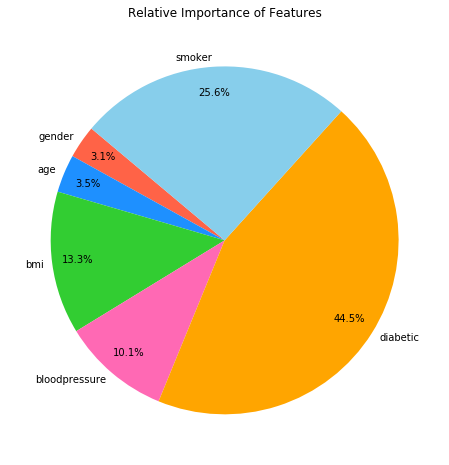

In [33]:
import matplotlib.pyplot as plt

# Feature names and their importances
feature_names = ['gender', 'age', 'bmi', 'bloodpressure', 'diabetic', 'smoker']
importances = [0.46, 0.53, 1.99, 1.51, 6.68, 3.84]

# Define a custom color palette
colors = ['#FF6347', '#1E90FF', '#32CD32', '#FF69B4', '#FFA500', '#87CEEB']

# Create a pie chart for feature importances using the custom color palette
plt.figure(figsize=(8, 8))
plt.pie(importances, labels=feature_names, autopct='%1.1f%%', startangle=140, pctdistance=0.85, labeldistance=1.05, colors=colors)
plt.title('Relative Importance of Features')
plt.show()